In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
IBMQ.load_accounts()

In [1]:
import numpy as np
import math
from qiskit import *
%matplotlib inline

In [42]:
#initialization
q = QuantumRegister(7, 'q')
c = ClassicalRegister(1, 'c')
circ = QuantumCircuit(q,c)

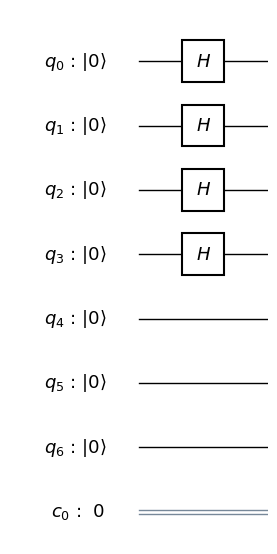

In [39]:
#superposition
circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.h(q[3])
circ.draw()

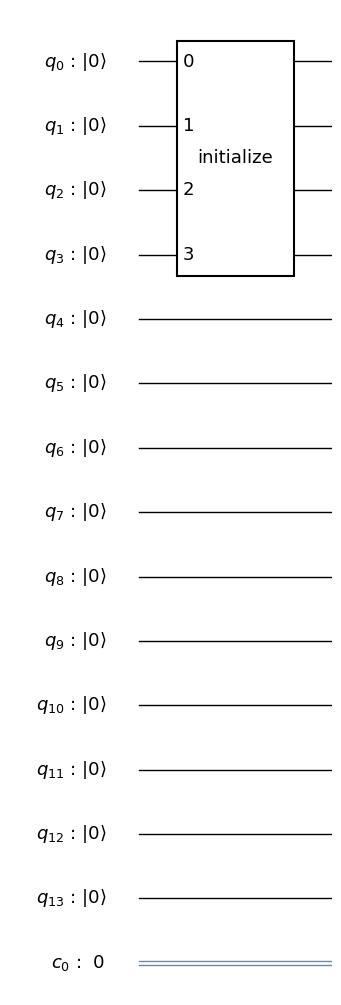

In [44]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer

q = QuantumRegister(14, "q")
c = ClassicalRegister(1, 'c')
circ = QuantumCircuit(q, c, name="initializer_circ")

desired_vector = [
    0,
    0,
    0,
    1 / math.sqrt(8),
    1 / math.sqrt(8),
    1 / math.sqrt(8),
    1 / math.sqrt(8),
    0,
    0,
    0,
    1 / math.sqrt(8),
    1 / math.sqrt(8),
    1 / math.sqrt(8),
    1 / math.sqrt(8),
    0,
    0]


circ.initialize(desired_vector, [q[0], q[1], q[2], q[3]])

circ.draw()


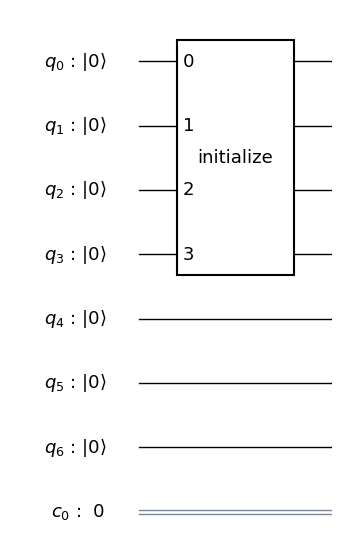

In [45]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer

q = QuantumRegister(7, "q")
c = ClassicalRegister(1, 'c')
circ = QuantumCircuit(q, c, name="initializer_circ")

desired_vector = [
    0,
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(4),
    1 / math.sqrt(4),
    1 / math.sqrt(4),
    1 / math.sqrt(4),
    0,
    0,
    0,
    0,
    0,
    0]


circ.initialize(desired_vector, [q[0], q[1], q[2], q[3]])

circ.draw()


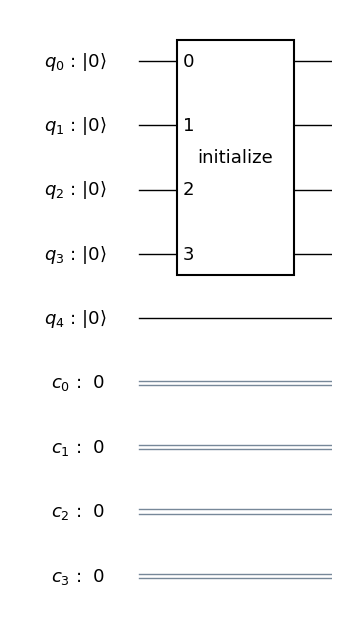

In [24]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer

q = QuantumRegister(5, "q")
c = ClassicalRegister(4, 'c')
circ = QuantumCircuit(q, c, name="initializer_circ")

desired_vector = [ math.sqrt(1-(0.45263672**2+
                  0.1059481**2+
                  0.15864426**2+
                  0.08982205**2+
                  0.08982205**2+
                  0.15864426**2+
                  0.1059481**2+
                  0.45263672**2)),
                  0.45263672,
                  0,         
                  0.1059481,  
                  0,         
                  0.15864426,
                  0,         
                  0.08982205, 
                  0,         
                  0.08982205, 
                  0,         
                  0.15864426,
                  0,         
                  0.1059481,  
                  0,         
                  0.45263672] 

circ.initialize(desired_vector, [q[0], q[1], q[2], q[3]])

circ.draw()


In [276]:
print(math.sqrt(1-     (0.45263672**2 +         0.1059481**2  +         0.15864426**2
 +         0.08982205**2 +        0.08982205**2 +         0.15864426**2
 +         0.1059481**2  +         0.45263672**2)))

0.7080381316241118


In [254]:
#postselect/measurenment
circ.measure(q[0], c[0])
circ.measure(q[1], c[1])
circ.measure(q[2], c[2])
circ.measure(q[3], c[3])

In [397]:
###############################################################
# Execute on a simulator backend.
###############################################################
shots = 10000

# Desired vector
print("Desired probabilities: ")
print(str(list(map(lambda x: format(abs(x * x), '.3f'), desired_vector))))

# Initialize on local simulator
sim_backend = BasicAer.get_backend('qasm_simulator')
job = execute(circ, sim_backend, shots=shots)
result = job.result()

n_qubits_qureg = q.size
counts = result.get_counts(circ)

qubit_strings = [format(i, '0%sb' % n_qubits_qureg) for
                 i in range(2 ** n_qubits_qureg)]
print("Probabilities from simulator: ")
print([format(counts.get(s, 0) / shots, '.3f') for
       s in qubit_strings])

Desired probabilities: 
['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.250', '0.250', '0.250', '0.250', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000']
Probabilities from simulator: 
['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'

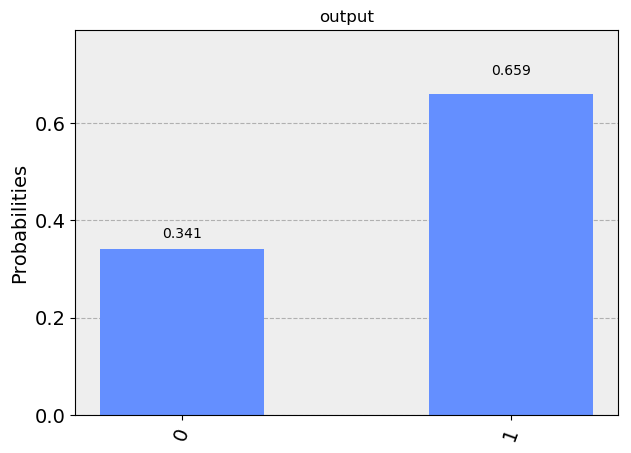

In [398]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(counts, title="output")

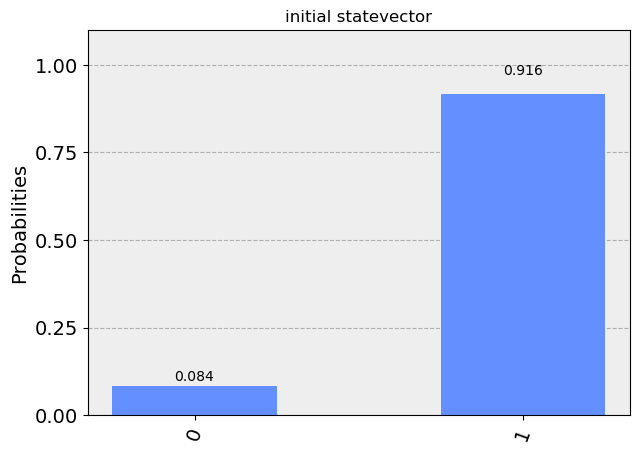

In [125]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(counts, title="initial statevector")

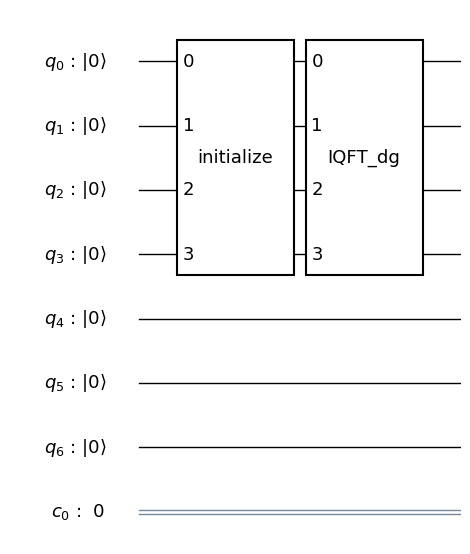

In [46]:
#IQFT
sub_q = QuantumRegister(4)
sub_circ = QuantumCircuit(sub_q, name='IQFT')
sub_circ.swap(sub_q[0], sub_q[3])
sub_circ.swap(sub_q[1], sub_q[2])
for j in range(4):
    for k in range(j):
        sub_circ.cu1(math.pi/float(2**(j-k)), sub_q[j], sub_q[k])
    sub_circ.h(sub_q[j])
sub_circ=sub_circ.inverse()
sub_inst = sub_circ.to_instruction()
circ.append(sub_inst, [q[0],q[1],q[2],q[3]])
circ.draw()

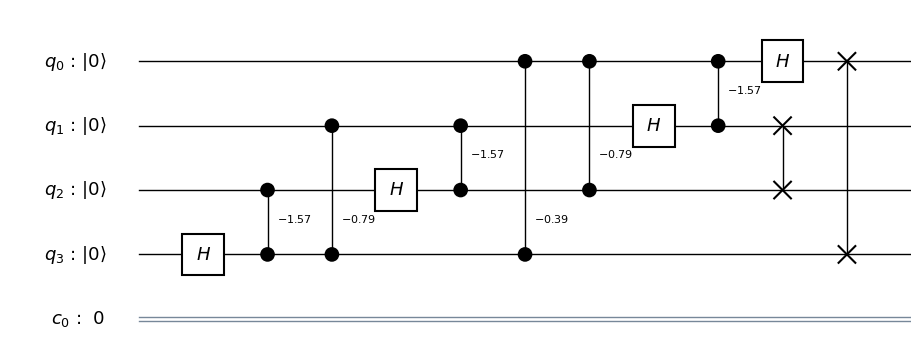

In [442]:
decomposed_circ = circ.decompose() # Doesn't modify original
decomposed_circ.draw()


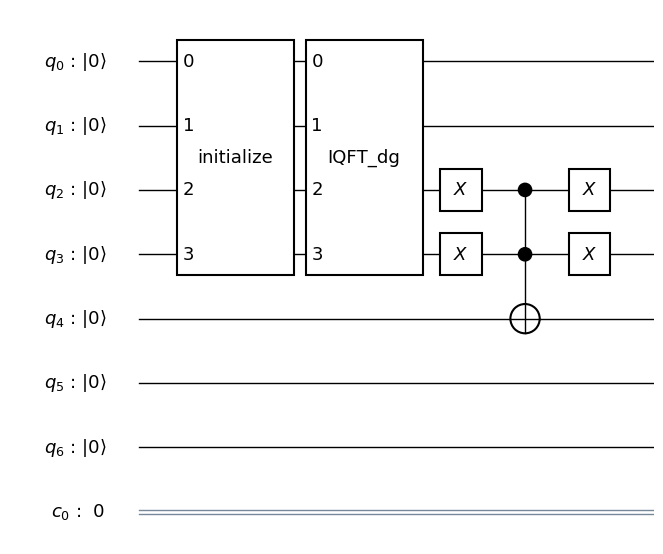

In [21]:
#marking |0000>,|0001>,|0010>,|0011>
circ.x(q[2])
circ.x(q[3])
circ.ccx(q[2], q[3], q[4])
circ.x(q[2])
circ.x(q[3])
circ.draw()

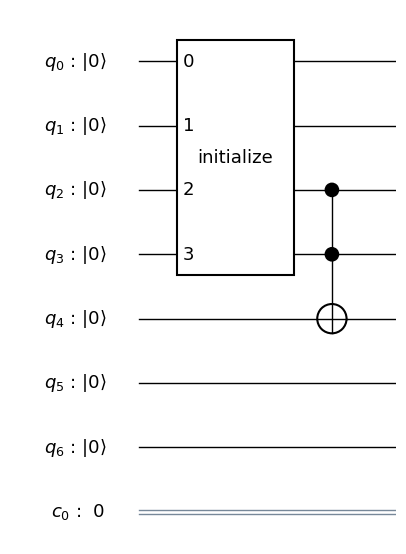

In [23]:
#marking |1100>,|1101>,|1110>,|1111>
circ.ccx(q[2], q[3], q[4])
circ.draw()

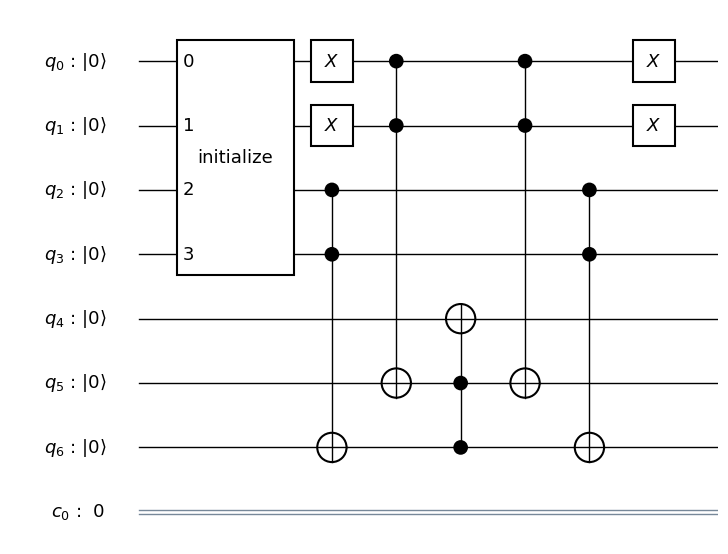

In [27]:

#unmarking |1100>
circ.x(q[0])
circ.x(q[1])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.ccx(q[5], q[6], q[4])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.x(q[0])
circ.x(q[1])
circ.draw()

In [17]:
#marking |0000>
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.ccx(q[5], q[6], q[4])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])

In [18]:
#marking |0001>
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.ccx(q[5], q[6], q[4])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])

In [6]:
#marking |0010>
circ.x(q[0])
circ.x(q[2])
circ.x(q[3])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.ccx(q[5], q[6], q[4])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.x(q[0])
circ.x(q[2])
circ.x(q[3])

In [52]:
#marking |0110>
circ.x(q[0])
circ.x(q[3])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.ccx(q[5], q[6], q[4])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.x(q[0])
circ.x(q[3])

In [53]:
#marking |0111>
circ.x(q[3])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.ccx(q[5], q[6], q[4])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.x(q[3])

In [54]:
#marking |1000>
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.ccx(q[5], q[6], q[4])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])

In [55]:
#marking |1001>
circ.x(q[1])
circ.x(q[2])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.ccx(q[5], q[6], q[4])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.x(q[1])
circ.x(q[2])

In [56]:
#marking |1010>
circ.x(q[0])
circ.x(q[2])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.ccx(q[5], q[6], q[4])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.x(q[0])
circ.x(q[2])

In [372]:
#marking |1110>
circ.x(q[0])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.ccx(q[5], q[6], q[4])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.x(q[0])

In [19]:
#marking |1111>
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
circ.ccx(q[5], q[6], q[4])
circ.ccx(q[0], q[1], q[5])
circ.ccx(q[2], q[3], q[6])
#circ.draw()

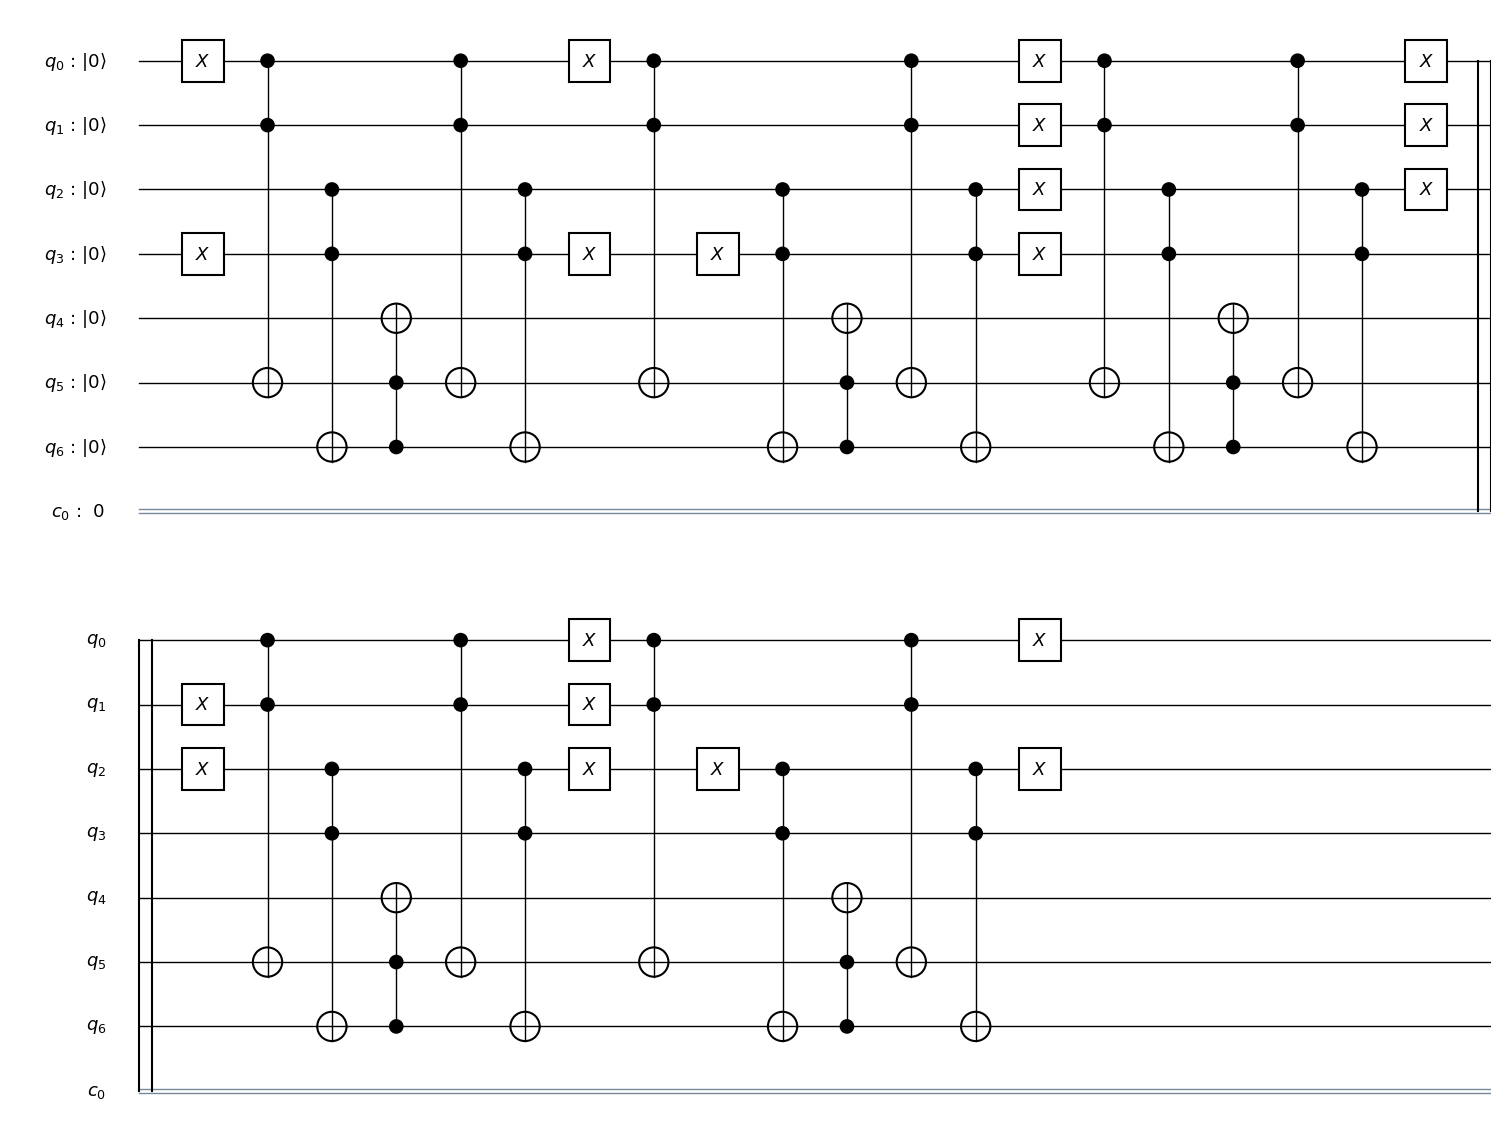

In [57]:
circ.draw()

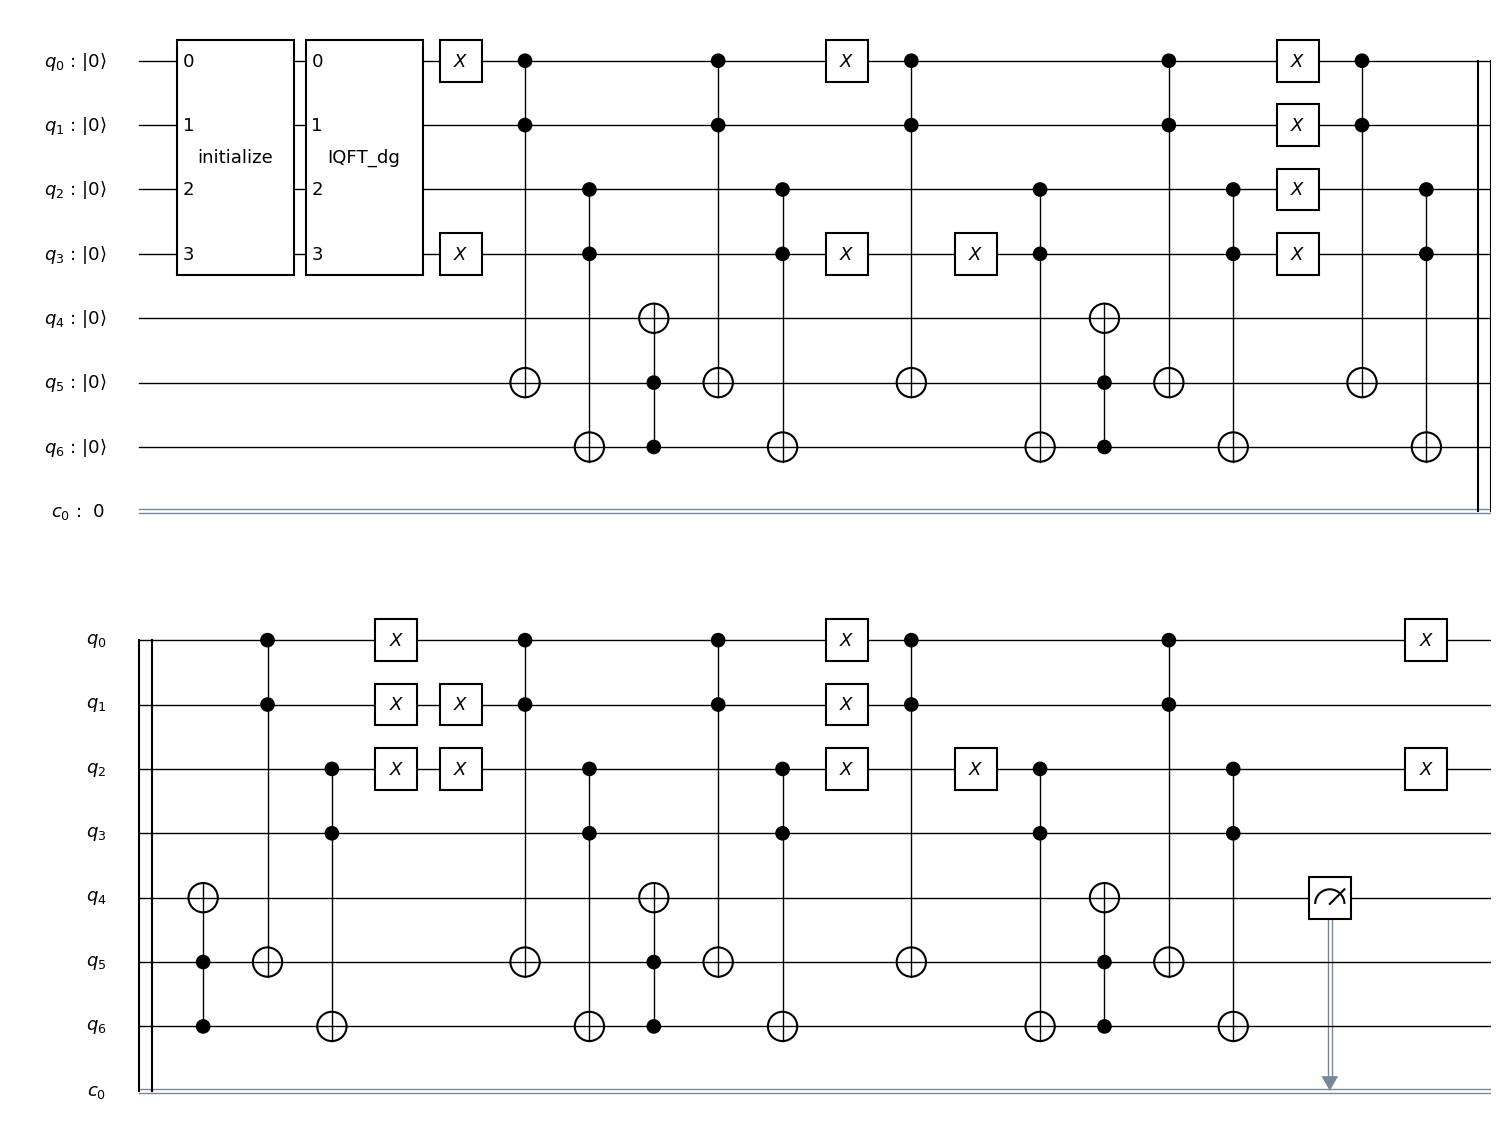

In [41]:
#measure ancilla
circ.measure(q[4], c[0])
circ.draw()

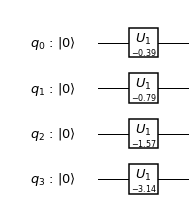

In [32]:
#removing phase

circ.u1(-math.pi/8,q[0])
circ.u1(-math.pi/4,q[1])
circ.u1(-math.pi/2,q[2])
circ.u1(-math.pi,q[3])
circ.draw()


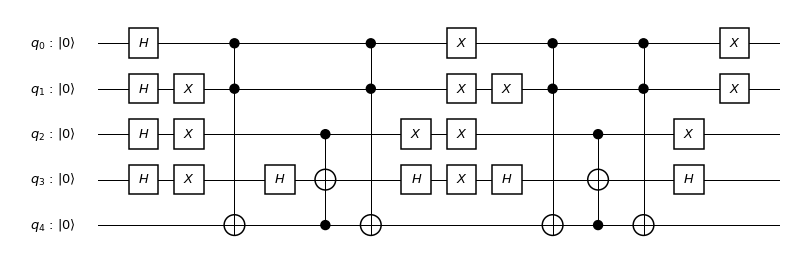

In [60]:
#phase inverstion of |1000>
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])
circ.h(q[3])
circ.ccx(q[0], q[1], q[4])
circ.ccx(q[2], q[4], q[3])
circ.ccx(q[0], q[1], q[4])
circ.h(q[3])
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])

circ.draw()

In [5]:
#phase inverstion of |0000>
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])
circ.h(q[3])
circ.ccx(q[0], q[1], q[4])
circ.ccx(q[2], q[4], q[3])
circ.ccx(q[0], q[1], q[4])
circ.h(q[3])
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])

#circ.draw()

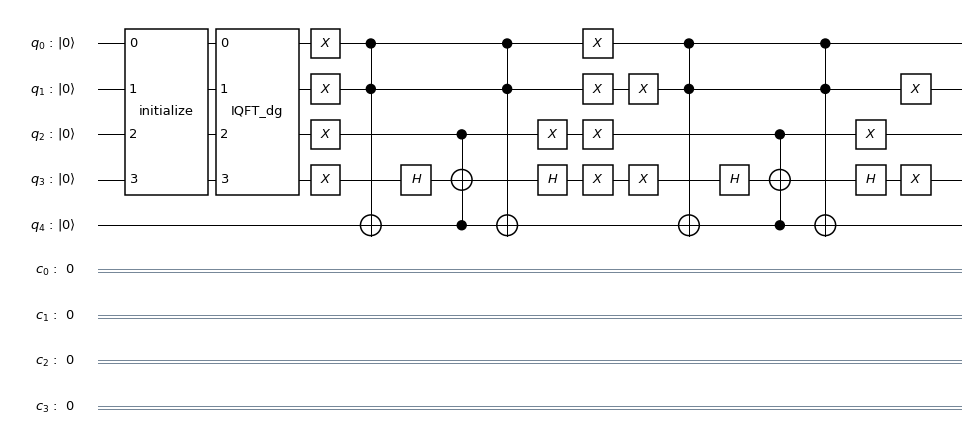

In [6]:
#phase inverstion of |0001>
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])
circ.h(q[3])
circ.ccx(q[0], q[1], q[4])
circ.ccx(q[2], q[4], q[3])
circ.ccx(q[0], q[1], q[4])
circ.h(q[3])
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])

circ.draw()

In [159]:
#phase inverstion of |1111>
circ.h(q[3])
circ.ccx(q[0], q[1], q[4])
circ.ccx(q[2], q[4], q[3])
circ.ccx(q[0], q[1], q[4])
circ.h(q[3])

#circ.draw()

In [160]:
#Diffusion Operator
circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.h(q[3])
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])
circ.h(q[3])
circ.ccx(q[0], q[1], q[4])
circ.ccx(q[2], q[4], q[3])
circ.ccx(q[0], q[1], q[4])
circ.h(q[3])
circ.x(q[0])
circ.x(q[1])
circ.x(q[2])
circ.x(q[3])
circ.h(q[0])
circ.h(q[1])
circ.h(q[2])
circ.h(q[3])
#circ.draw()


In [44]:
def qft(circ, q, n):
    """n-qubit QFT on q in circ."""
    circ.swap(q[0], q[3])
    circ.swap(q[1], q[2])
    for j in range(n):
        for k in range(j):
            circ.cu1(math.pi/float(2**(j-k)), q[j], q[k])
        circ.h(q[j])
    

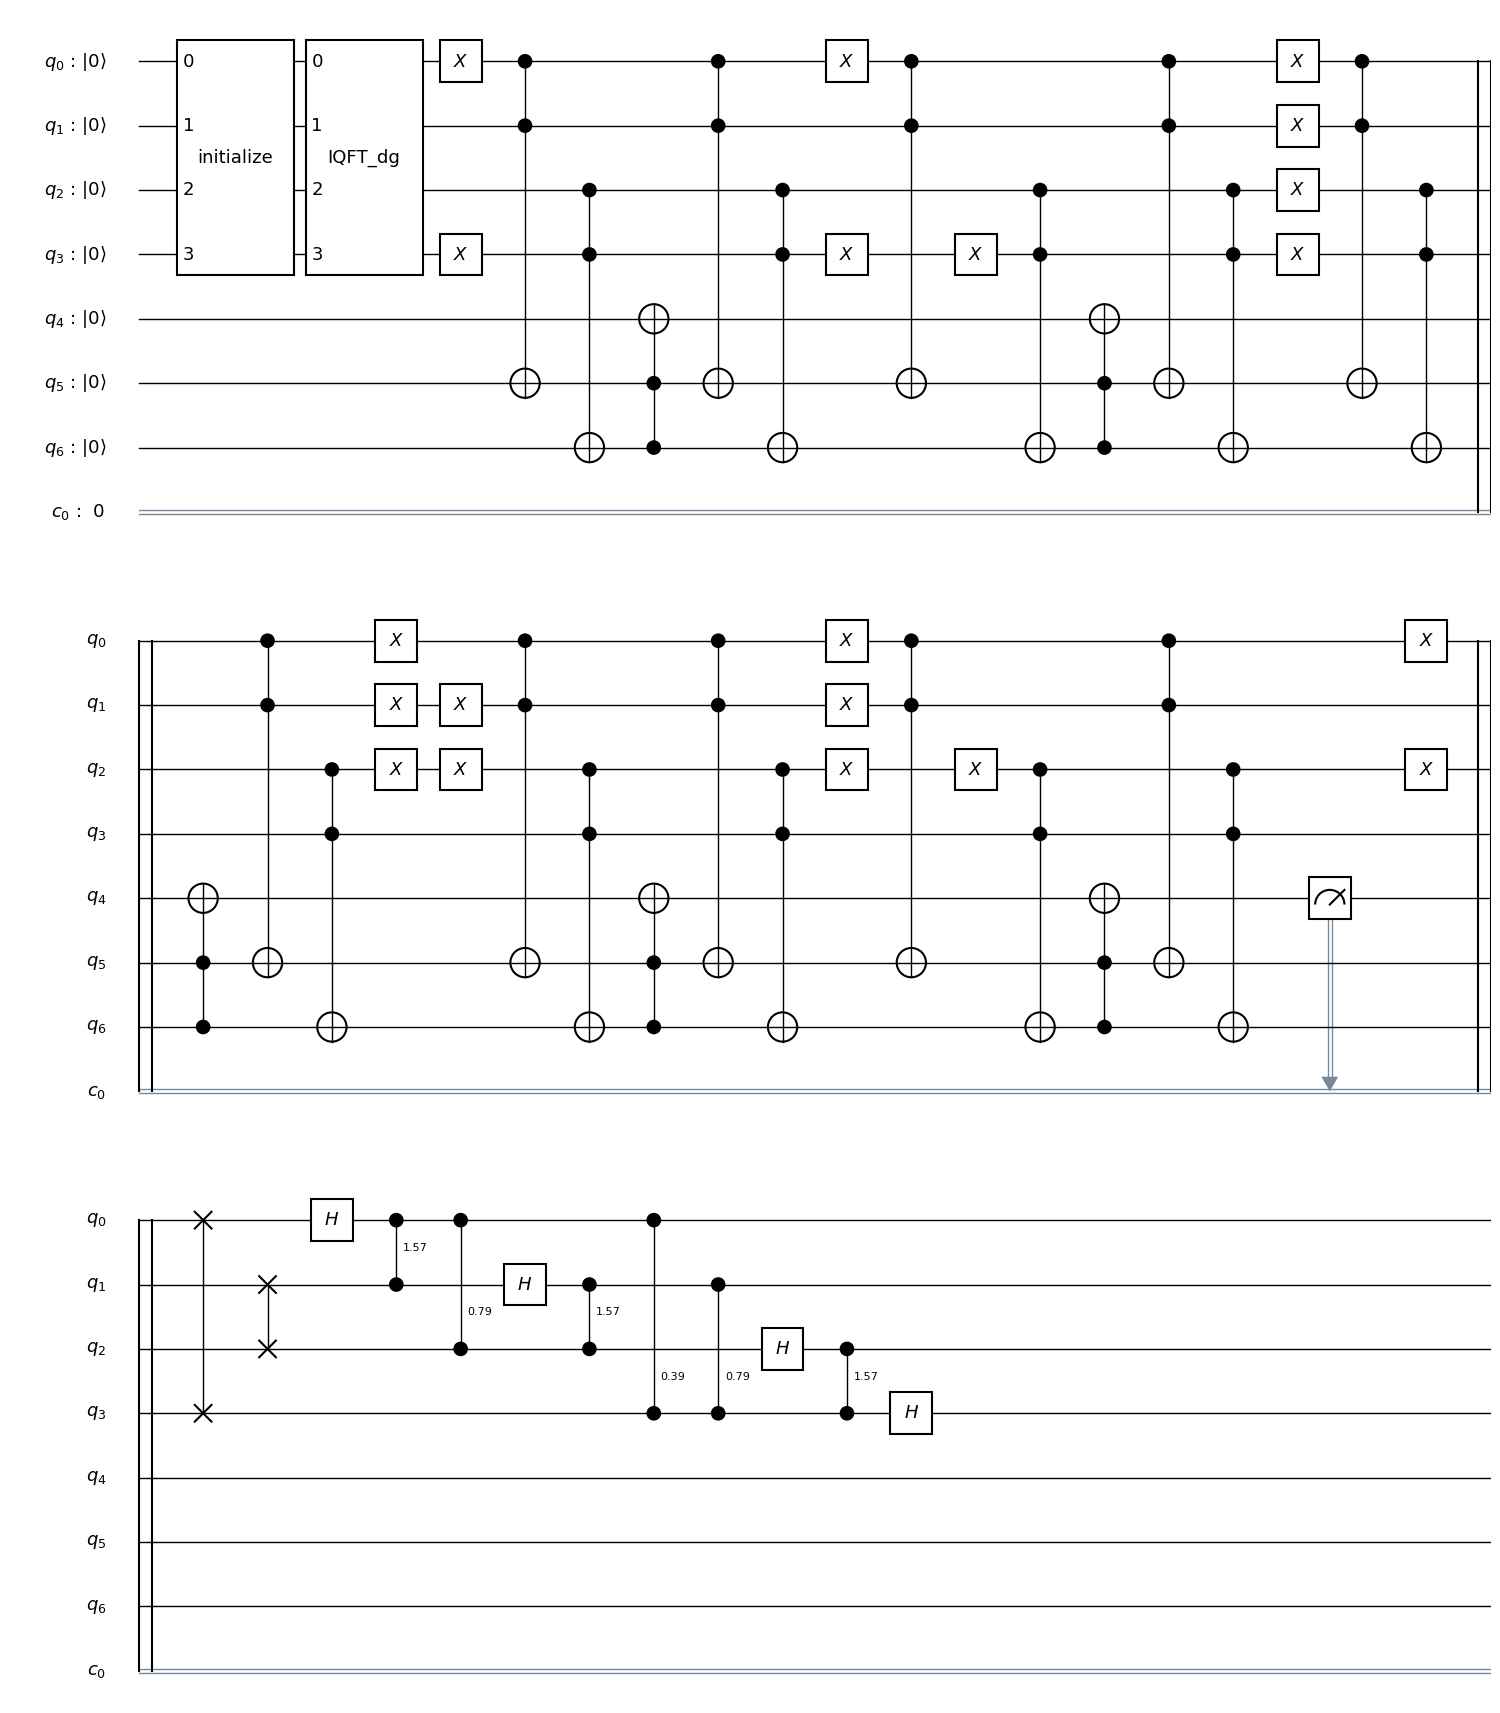

In [45]:
qft(circ, q, 4)
circ.draw()

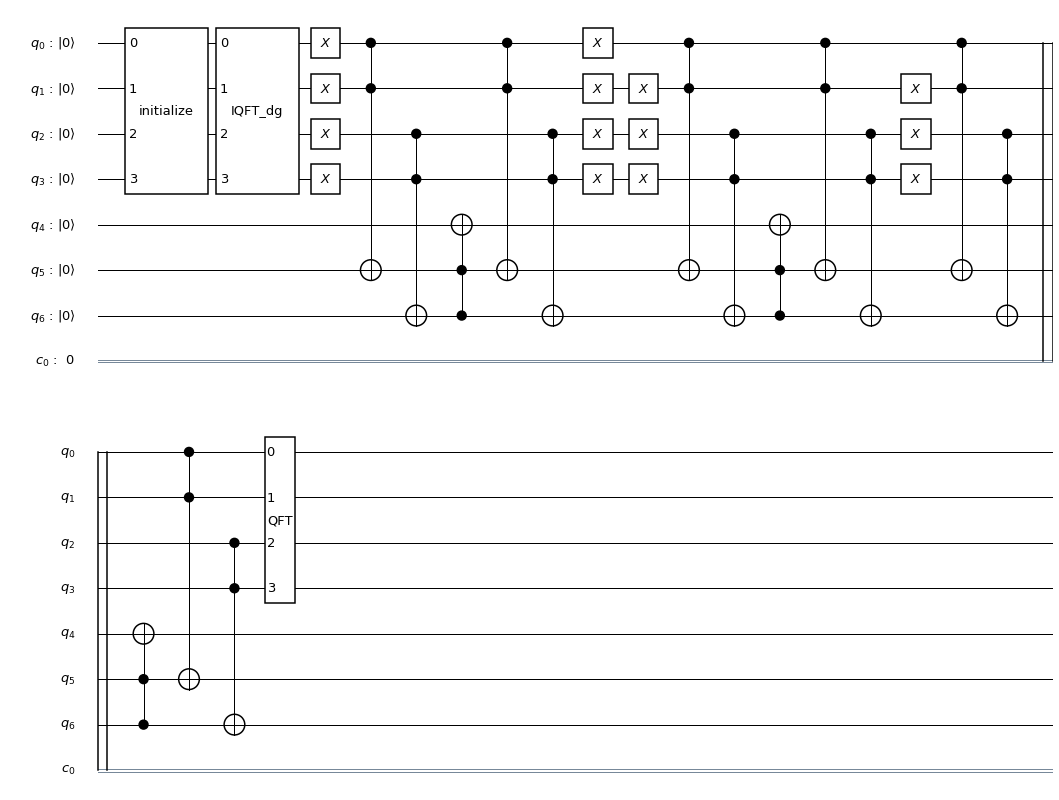

In [20]:
#QFT
sub_q = QuantumRegister(4)
sub_circ = QuantumCircuit(sub_q, name='QFT')
sub_circ.swap(sub_q[0], sub_q[3])
sub_circ.swap(sub_q[1], sub_q[2])
for j in range(4):
    for k in range(j):
        sub_circ.cu1(math.pi/float(2**(j-k)), sub_q[j], sub_q[k])
    sub_circ.h(sub_q[j])
sub_inst = sub_circ.to_instruction()
circ.append(sub_inst, [q[0],q[1],q[2],q[3]])
circ.draw()

In [156]:
# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
unitary = result.get_unitary(circ)
print("Circuit unitary:\n", unitary)

Circuit unitary:
 [[ 0.25      +0.j          0.25      +0.j          0.25      +0.j
   0.25      +0.j          0.25      +0.j          0.25      +0.j
   0.25      +0.j          0.25      +0.j          0.25      +0.j
   0.25      +0.j          0.25      +0.j          0.25      +0.j
   0.25      +0.j          0.25      +0.j          0.25      +0.j
   0.25      +0.j        ]
 [ 0.25      +0.j          0.23096988-0.09567086j  0.1767767 -0.1767767j
   0.09567086-0.23096988j  0.        -0.25j       -0.09567086-0.23096988j
  -0.1767767 -0.1767767j  -0.23096988-0.09567086j -0.25      +0.j
  -0.23096988+0.09567086j -0.1767767 +0.1767767j  -0.09567086+0.23096988j
   0.        +0.25j        0.09567086+0.23096988j  0.1767767 +0.1767767j
   0.23096988+0.09567086j]
 [ 0.25      +0.j          0.        -0.25j       -0.25      +0.j
   0.        +0.25j        0.25      +0.j          0.        -0.25j
  -0.25      +0.j          0.        +0.25j        0.25      +0.j
   0.        -0.25j       -0.25      +

In [47]:
# Import Aer
from qiskit import BasicAer

# Run the quantum circuit on a statevector simulator backend
backend = BasicAer.get_backend('statevector_simulator')
# Create a Quantum Program for execution 
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)
print(np.absolute(outputstate))

BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore

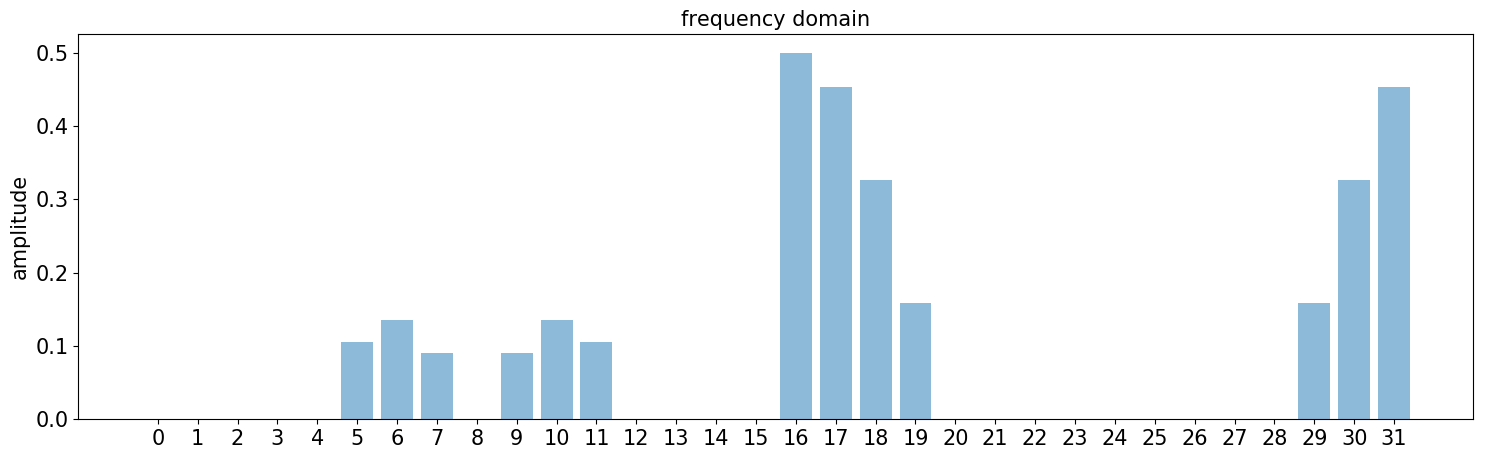

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(18,5))
objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10','11',
           '12','13','14','15','16','17','18','19','20','21', '22', '23', '24', '25', '26', 
           '27', '28', '29', '30', '31')
#objects = ('00000', '00001', '00010', '00011', '00100', '00101','00110','00111','01000','01001','01010'
 #          ,'01011',
  #         '01100','01101','01110','01111','10000', '10001', '10010', '10011', '10100', 
   #        '10101','10110','10111','11000','11001','11010','11011',
    #       '11100','11101','11110','11111')
y_pos = np.arange(len(objects))
x=np.absolute(outputstate)
x=x[0:32]
plt.bar(y_pos, x, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('amplitude')
plt.title('frequency domain')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.show()